## Dataset Understanding

In [95]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})

In [96]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [97]:
train = pd.read_csv("train_fNxu4vz.csv")
test = pd.read_csv("test_fjtUOL8.csv")

In [98]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [99]:
train.describe(include='all')

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
count,1.643090e+05,164309,156938,138960,1.392070e+05,164309,164309,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309,164309.000000
unique,NaN,1290,11,5,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,"10,000",10+ years,Mortgage,NaN,VERIFIED - income,debt_consolidation,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,11622,52915,70345,NaN,59421,97101,NaN,NaN,NaN,NaN,NaN,117176,NaN
mean,1.008216e+07,NaN,NaN,NaN,7.333116e+04,NaN,NaN,17.207189,0.781698,34.229356,11.193818,25.067665,NaN,2.158951
std,4.743207e+04,NaN,NaN,NaN,6.037750e+04,NaN,NaN,7.845083,1.034747,21.761180,4.991813,11.583067,NaN,0.738364
min,1.000000e+07,NaN,NaN,NaN,4.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,1.000000
25%,1.004108e+07,NaN,NaN,NaN,4.500000e+04,NaN,NaN,11.370000,0.000000,16.000000,8.000000,17.000000,NaN,2.000000
50%,1.008216e+07,NaN,NaN,NaN,6.300000e+04,NaN,NaN,16.840000,0.000000,31.000000,10.000000,23.000000,NaN,2.000000
75%,1.012323e+07,NaN,NaN,NaN,8.869750e+04,NaN,NaN,22.780000,1.000000,50.000000,14.000000,32.000000,NaN,3.000000


In [100]:
# This will give us the total number of missing values feature-wise
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

### Feature wise adjustment

In [101]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

**1. Loan_Amount_Requested**

In [102]:
train['Loan_Amount_Requested']= train['Loan_Amount_Requested'].str.replace(',', '')
train['Loan_Amount_Requested']= train['Loan_Amount_Requested'].astype(int)

In [103]:
train['Loan_Amount_Requested'].head()

0     7000
1    30000
2    24725
3    16000
4    17000
Name: Loan_Amount_Requested, dtype: int32

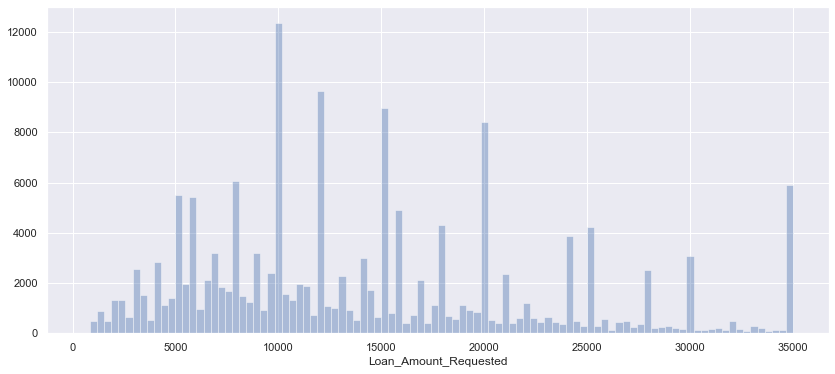

In [104]:
sns.distplot(train['Loan_Amount_Requested'], bins=100, kde=False)

**2. Length Employed**

In [105]:
train['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

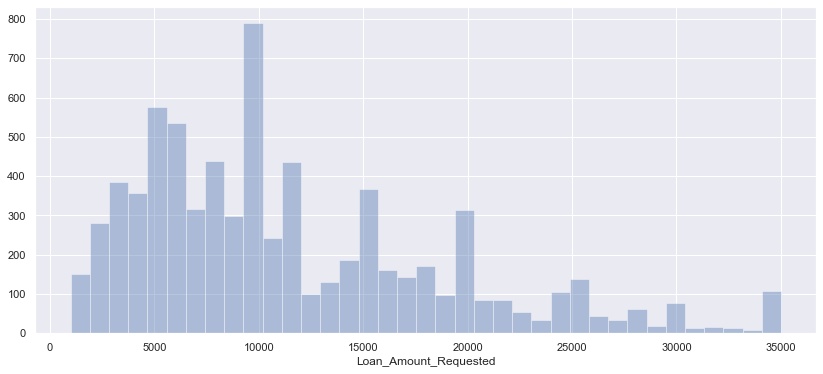

In [106]:
sns.distplot(train[(train['Length_Employed'].isna())]['Loan_Amount_Requested'],kde=False)

In [107]:
train['Length_Employed'] = train['Length_Employed'].fillna("exp_NA")

In [108]:
train['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', 'exp_NA', '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [109]:
train.groupby('Length_Employed')[['Interest_Rate']].count()

,Interest_Rate
Length_Employed,
1 year,10422
10+ years,52915
2 years,14620
3 years,12974
4 years,9784
5 years,10814
6 years,9094
7 years,9308
8 years,7917


Dividing into 4 categories.
Less_experience
Med_experience
NA_experience
Experienced

In [110]:
train["Length_Employed"].replace({"< 1 year": "L", '1 year': 'L', '2 years':'L', '3 years':'L'}, inplace=True)
train["Length_Employed"].replace({"4 years": "M", '5 years': 'M', '6 years':'M', '7 years':'M'}, inplace=True)
train["Length_Employed"].replace({"8 years": "E", '9 years': 'E', '10+ years':'E'}, inplace=True)

In [111]:
train['Length_Employed'].unique()

array(['L', 'M', 'E', 'exp_NA'], dtype=object)

In [112]:
#one hot encoding
train = encode_and_bind(train, 'Length_Employed')

In [113]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Length_Employed_E,Length_Employed_L,Length_Employed_M,Length_Employed_exp_NA
0,10000001,7000,L,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1,0,1,0,0
1,10000002,30000,M,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,0,0,1,0
2,10000003,24725,M,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3,0,0,1,0
3,10000004,16000,L,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3,0,1,0,0
4,10000005,17000,E,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1,1,0,0,0


In [114]:
train = train.drop('Length_Employed',1)

**3. Home_Owner**

In [115]:
train['Home_Owner'].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [116]:
train['Home_Owner'] = train['Home_Owner'].fillna("N/A")

In [117]:
train.groupby('Home_Owner')[['Interest_Rate']].count()

,Interest_Rate
Home_Owner,
Mortgage,70345
N/A,25349
None,10
Other,49
Own,12525
Rent,56031


In [118]:
train['Home_Owner'].replace({'N/A':'Other', 'None':'Other'},inplace=True)

In [119]:
train['Home_Owner'].unique()

array(['Rent', 'Mortgage', 'Other', 'Own'], dtype=object)

In [120]:
train = encode_and_bind(train, 'Home_Owner')

In [121]:
train = train.drop('Home_Owner',1)

**4. Annual_Income & Month_Since_Delinquency**

In [122]:
(train['Annual_Income'])

0         68000.0
1             NaN
2         75566.4
3         56160.0
4         96000.0
           ...   
164304        NaN
164305        NaN
164306        NaN
164307        NaN
164308        NaN
Name: Annual_Income, Length: 164309, dtype: float64

In [123]:
train['Months_Since_Deliquency'].unique()

array([ nan,  17.,  16.,  68.,  13.,   6.,  64.,  10.,  63.,  33.,  22.,
        28.,   8.,  26.,  41.,  46.,  62.,  21.,  12.,  52.,   3.,  65.,
        43.,  53.,  44.,   1.,  11.,  71.,  23.,  15.,  48.,  39.,  30.,
        32.,  18.,  24.,  47.,  66.,  19.,  76.,   4.,  29.,  45.,  38.,
        56.,  37.,  20.,  35.,   2.,   9.,  34.,  14.,  59.,  36.,  50.,
        81.,  72.,  69.,  57.,  25.,   7.,  49.,  31.,  78.,  70.,  27.,
         5.,  51.,  58.,  75.,  42.,  74.,  40.,  67.,  61.,  55.,  77.,
        54.,   0.,  60.,  73.,  79.,  82.,  80.,  83.,  88., 127., 106.,
        99.,  97., 139.,  96., 119., 116.,  94., 141.,  86.,  91.,  84.,
        85.,  95.,  90.,  87., 103., 101., 121., 148.,  93., 122.,  92.,
       180., 105., 110., 129., 130., 135., 114., 102., 111.,  98., 131.,
       107., 170.])

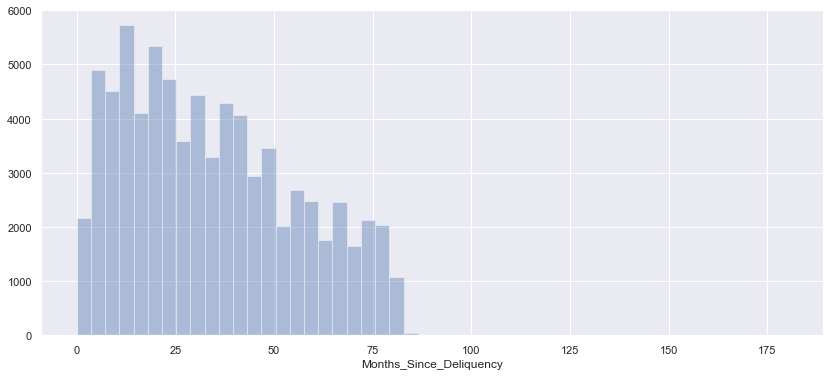

In [124]:
sns.distplot(train['Months_Since_Deliquency'], kde=False)

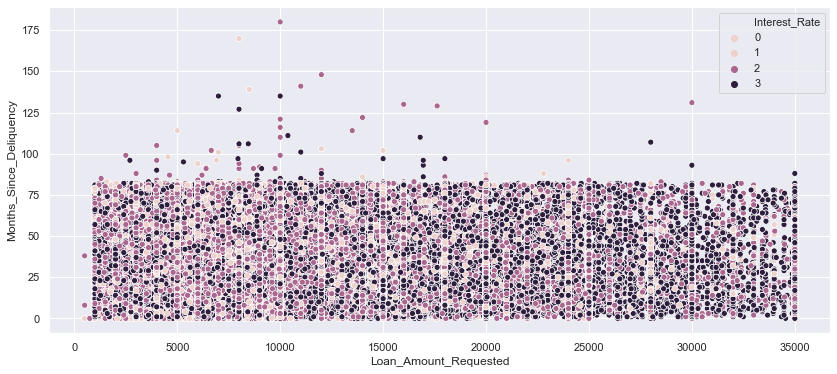

In [125]:
sns.scatterplot(x = 'Loan_Amount_Requested', y = 'Months_Since_Deliquency', hue = 'Interest_Rate', data = train)

In [126]:
train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].fillna(0)

In [127]:
# Checking if only Annual_Income has the missing values
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
Length_Employed_E              0
Length_Employed_L              0
Length_Employed_M              0
Length_Employed_exp_NA         0
Home_Owner_Mortgage            0
Home_Owner_Other               0
Home_Owner_Own                 0
Home_Owner_Rent                0
dtype: int64

Imputing values later for Annual_Income

**5. Income_Verified**

In [128]:
train.groupby('Income_Verified')[['Interest_Rate']].count()

,Interest_Rate
Income_Verified,
VERIFIED - income,59421
VERIFIED - income source,53015
not verified,51873


In [129]:
train['Income_Verified'].replace({'VERIFIED - income source':'VERIFIED - income'},inplace=True)

In [130]:
train = encode_and_bind(train,'Income_Verified')

In [131]:
train = train.drop('Income_Verified',1)

**6. Purpose_Of_Loan**

In [132]:
train['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

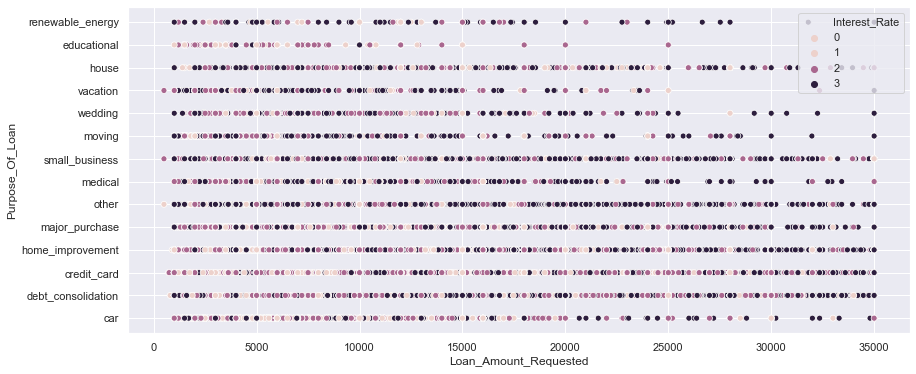

In [133]:
sns.scatterplot(x = 'Loan_Amount_Requested', y = 'Purpose_Of_Loan', hue = 'Interest_Rate', data = train)

In [134]:
train = encode_and_bind(train,'Purpose_Of_Loan')
train = train.drop('Purpose_Of_Loan',1)

**7. Others**

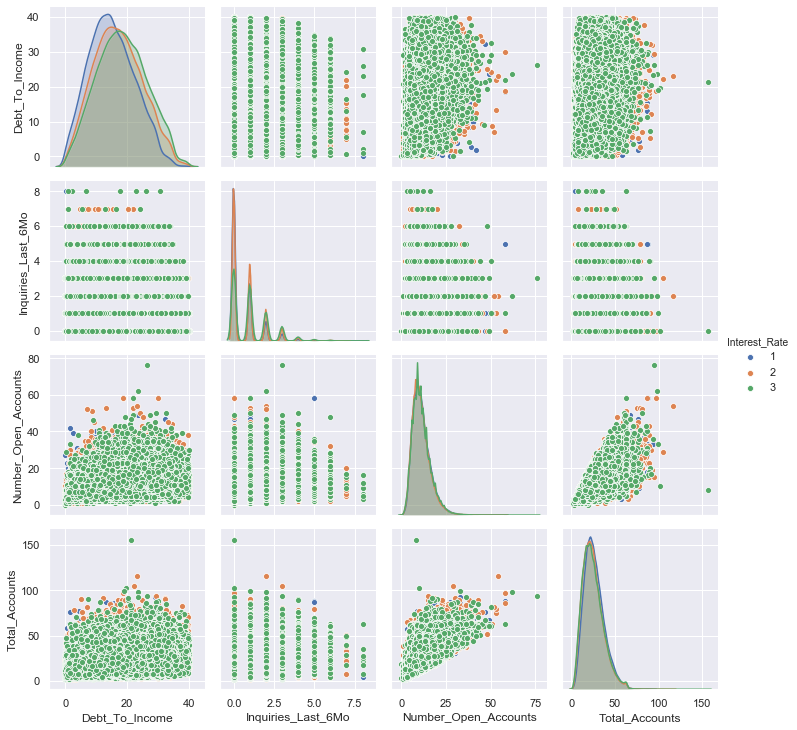

In [135]:
sns.pairplot(train, hue = 'Interest_Rate',
             vars = ['Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts'] )

In [136]:
train.groupby('Gender')[['Interest_Rate']].count()

,Interest_Rate
Gender,
Female,47133
Male,117176


In [137]:
train = encode_and_bind(train,'Gender')
train = train.drop('Gender',1)

In [138]:
train.tail()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Length_Employed_E,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
164304,10164305,20725,NaN,13.56,0,0.0,13,16,2,1,...,0,0,0,0,0,0,0,0,0,1
164305,10164306,6000,NaN,9.12,0,36.0,13,30,2,1,...,0,0,0,0,0,1,0,0,0,1
164306,10164307,20250,NaN,18.17,1,0.0,17,30,1,1,...,0,0,0,0,0,0,0,0,0,1
164307,10164308,10000,NaN,18.75,1,48.0,16,62,3,0,...,1,0,0,0,0,0,0,0,1,0
164308,10164309,9250,NaN,19.44,1,0.0,5,9,2,1,...,0,0,0,0,0,0,0,0,1,0


`Imputing for Annual Income NaN`

In [139]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy="median")
data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(train))
data_with_imputed_values.columns = train.columns

In [140]:
train = data_with_imputed_values
train.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Length_Employed_E,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10000001.0,7000.0,68000.0,18.37,0.0,0.0,9.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10000002.0,30000.0,63000.0,14.93,0.0,17.0,12.0,24.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10000003.0,24725.0,75566.4,15.88,0.0,0.0,12.0,16.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10000004.0,16000.0,56160.0,14.34,3.0,0.0,16.0,22.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10000005.0,17000.0,96000.0,22.17,1.0,0.0,19.0,30.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Test Data modify**

In [141]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [143]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [144]:
test['Loan_Amount_Requested']= test['Loan_Amount_Requested'].str.replace(',', '')
test['Loan_Amount_Requested']= test['Loan_Amount_Requested'].astype(int)
test['Length_Employed'] = test['Length_Employed'].fillna("exp_NA")
test["Length_Employed"].replace({"< 1 year": "L", '1 year': 'L', '2 years':'L', '3 years':'L'}, inplace=True)
test["Length_Employed"].replace({"4 years": "M", '5 years': 'M', '6 years':'M', '7 years':'M'}, inplace=True)
test["Length_Employed"].replace({"8 years": "E", '9 years': 'E', '10+ years':'E'}, inplace=True)
test = encode_and_bind(test, 'Length_Employed')
test = test.drop('Length_Employed',1)
test['Home_Owner'] = test['Home_Owner'].fillna("N/A")
test['Home_Owner'].replace({'N/A':'Other', 'None':'Other'},inplace=True)
test = encode_and_bind(test, 'Home_Owner')
test = test.drop('Home_Owner',1)
test['Months_Since_Deliquency'] = test['Months_Since_Deliquency'].fillna(0)
test['Income_Verified'].replace({'VERIFIED - income source':'VERIFIED - income'},inplace=True)
test = encode_and_bind(test,'Income_Verified')
test = test.drop('Income_Verified',1)
test = encode_and_bind(test,'Purpose_Of_Loan')
test = test.drop('Purpose_Of_Loan',1)
test = encode_and_bind(test,'Gender')
test = test.drop('Gender',1)
my_imputer = SimpleImputer(strategy="median")
data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(test))
data_with_imputed_values.columns = test.columns
test = data_with_imputed_values

In [145]:
test.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_E,Length_Employed_L,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10164310.0,27500.0,129000.0,12.87,0.0,68.0,10.0,37.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10164311.0,26000.0,110000.0,11.37,0.0,0.0,6.0,23.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10164312.0,6075.0,75000.0,6.83,2.0,0.0,5.0,20.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10164313.0,12000.0,73000.0,7.76,0.0,0.0,6.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10164314.0,35000.0,156000.0,9.62,0.0,26.0,9.0,21.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Saving the datas**

In [147]:
train.to_csv('train_modified.csv')
test.to_csv('test_modified.csv')